In [1]:
import pandas as pd
from matplotlib import pyplot as plt

dct = [
   {'time': '2023/06/15 09:55:00',
   'str':'Started anesthesia'},
   {'time': '2023/06/15 10:09:00',
   'str':'Started drilling'},
    {'time': '2023/06/15 10:49:00',
   'str':'Found the bregma (later turned out that this was a fake)'},
    {'time': '2023/06/15 11:14:00',
   'str':'The bone removed for SNr craniotomy'},     
    {'time': '2023/06/15 11:37:00',
   'str':'Front craniotomy started'},
    {'time': '2023/06/15 11:51:00',
   'str':'The bone removed for front craniotomy'},
    {'time': '2023/06/15 12:05:00',
   'str':'SNr dura removed'},
    {'time': '2023/06/15 13:05:00',
   'str':'Finished'},
]

df = pd.DataFrame(dct)

# start_datetime = datetime.strptime(df['time'], '%Y/%m/%d %H:%M:%S')

df['datetime'] = pd.to_datetime(df['time'])

df['elapsed_time'] = (df['datetime'] - df.loc[0,'datetime']).fillna(pd.Timedelta(minutes=0))

df['elapsed_time'] = df['elapsed_time'].dt.total_seconds() / 60.0

In [2]:
df.shape[0]

8

In [3]:
df['elapsed_time']

0      0.0
1     14.0
2     54.0
3     79.0
4    102.0
5    116.0
6    130.0
7    190.0
Name: elapsed_time, dtype: float64

In [4]:
df['str']

0                                   Started anesthesia
1                                     Started drilling
2    Found the bregma (later turned out that this w...
3                  The bone removed for SNr craniotomy
4                             Front craniotomy started
5                The bone removed for front craniotomy
6                                     SNr dura removed
7                                             Finished
Name: str, dtype: object

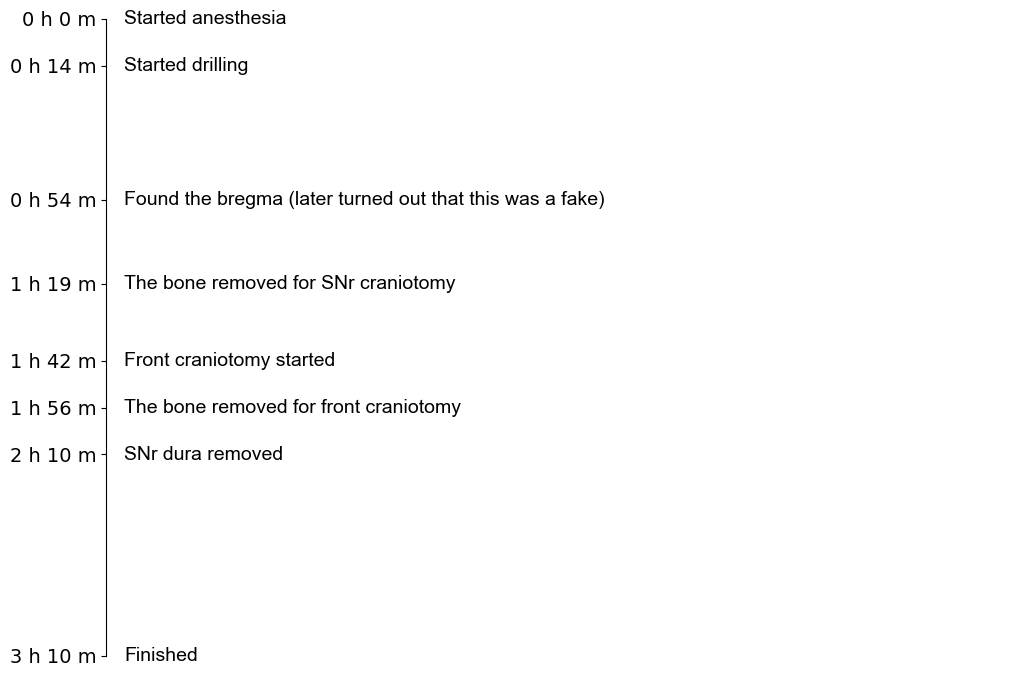

In [5]:
cm = 1/2.54  # centimeters in inches
A4 = (29.7*cm, 21*cm)
fig, ax = plt.subplots(figsize=A4)

plt.rcParams['font.family'] = ['Arial']

for r in range(0, df.shape[0]):
    ax.text(1, df.loc[r, 'elapsed_time'], df.loc[r, 'str'], va='center', fontsize=14)

ax.invert_yaxis()
ax.set_ylim(0, max(df['elapsed_time'])) #NOTE this was necessary to avoid image too big error
ax.set_xlim(0, 50)
ax.set_yticks(df['elapsed_time'])

def minutes_to_string(x):
    hours, minutes = divmod(x, 60)
    return f'{hours:.0f} h {minutes:.0f} m'

ax.set_yticklabels(df['elapsed_time'].apply(lambda x: minutes_to_string(x)))

ax.set_xticks([])
ax.tick_params(axis='y', which='major', labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

plt.show()

https://stackoverflow.com/questions/52375207/matplotlib-error-image-size-of-362976x273-pixels-is-too-large